# Accuracy

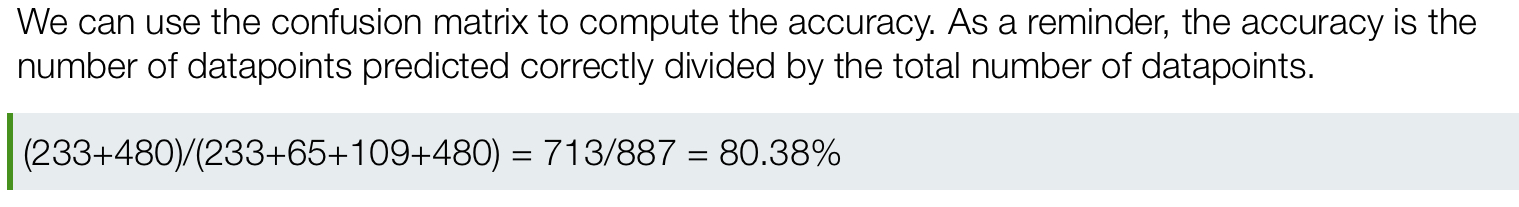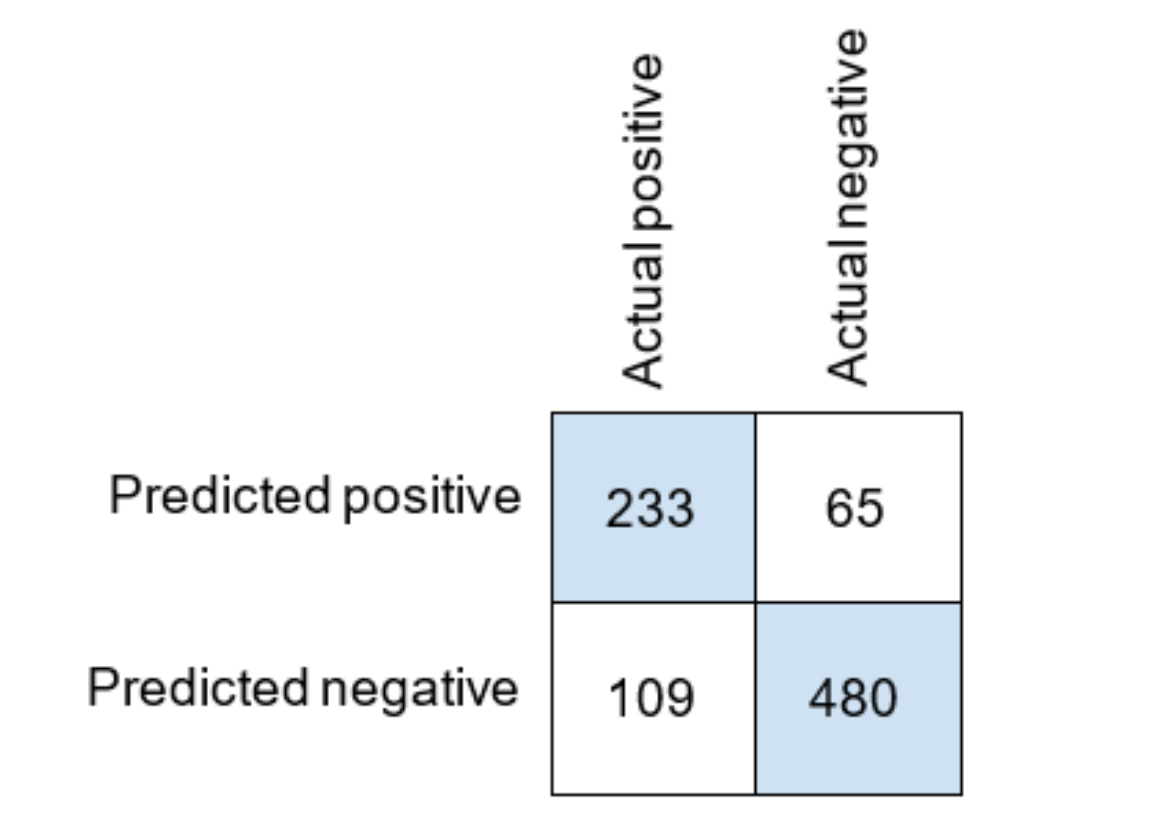

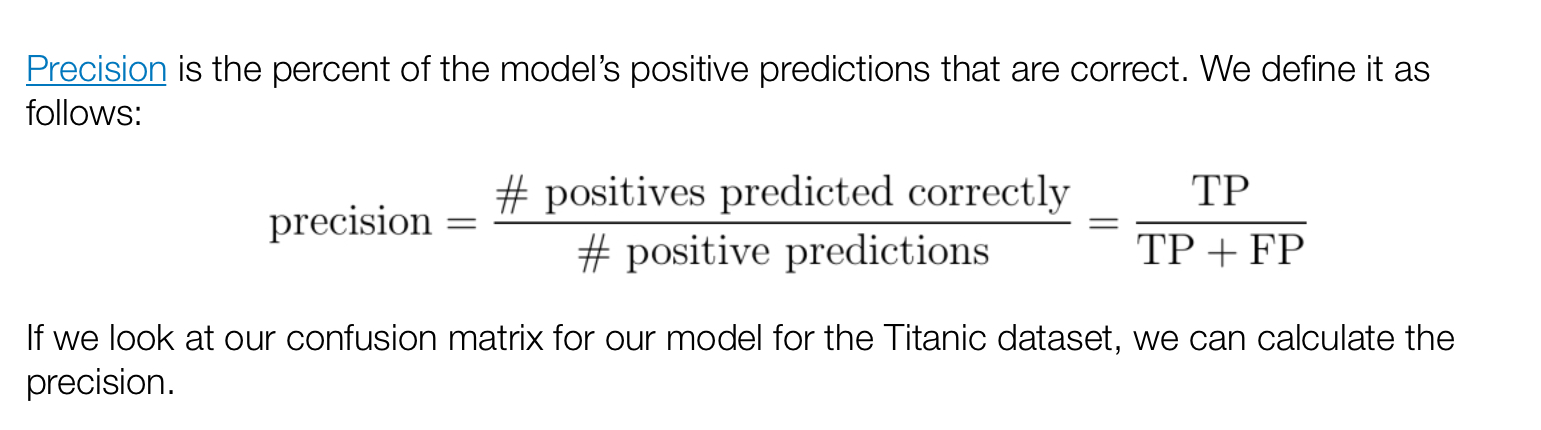

**recall** is 'true positive/(true positive + fales negative)'

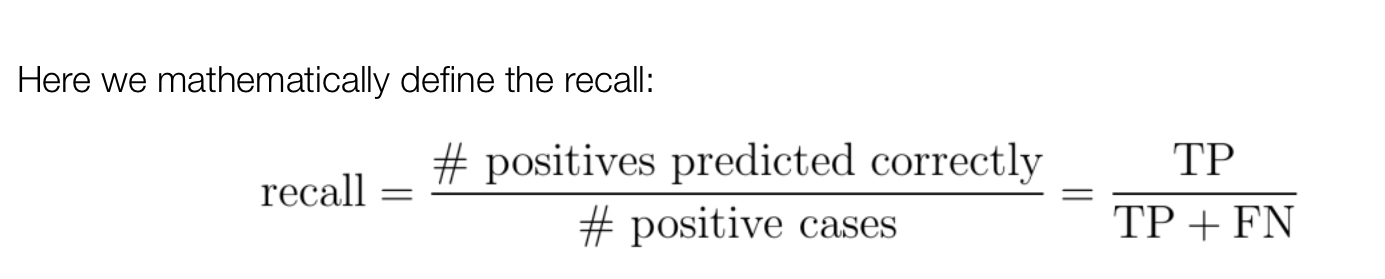

F1 score is the average of precision and recall
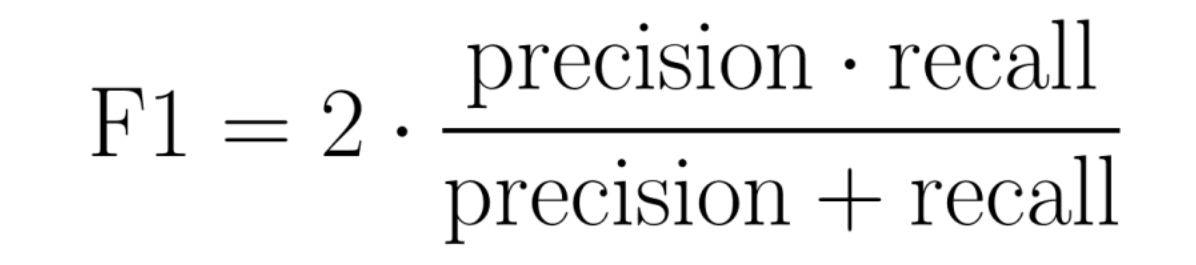

In [ ]:
##We have a separate function
##for each of the accuracy, precision, recall and F1 score.
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))


accuracy: 0.8049605411499436
precision: 0.7734627831715211
recall: 0.6988304093567251
f1 score: 0.7342549923195083


# Precision and Recall Trade-off
The higher the false positives, the lower the precision. Because of the high cost to false positives in the first case, it would be worth having a low recall in order to have a very high precision. In case 2, you would want more of a balance between precision and recall.

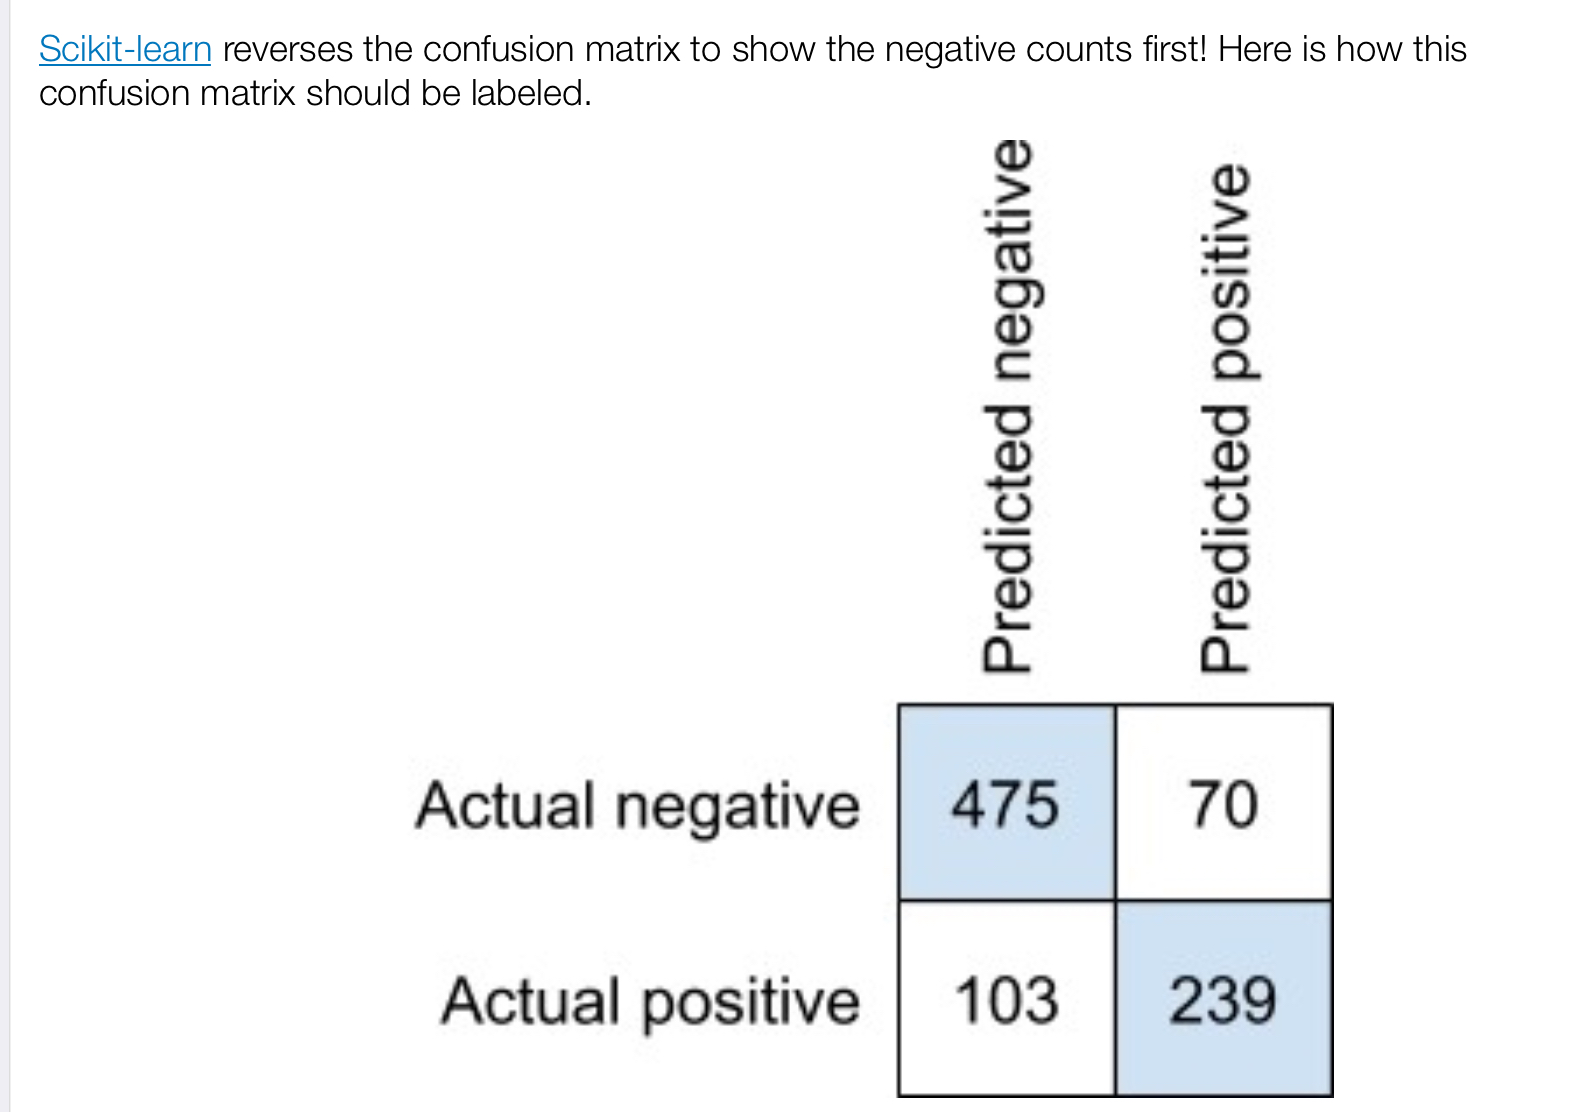

# Overfitting
when we perform well on the data the model has already seen, but we don’t perform well on new data


To simulate making predictions on new unseen data, we can break our dataset into a **TRAINING SET** and a **TEST SET**. The training set is used for building the models. The test set is used for evaluating the models. We split our data before building the model, thus the model has no knowledge of the test set and we’ll be giving it a fair assessment.

The more features we have in our dataset, the more prone we’ll be to overfitting.

In [ ]:
## traing set and test set
## The training set is used for building the models. 
## The test set is used for evaluating the models. 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

whole dataset: (887, 6) (887,)
training set: (665, 6) (665,)
test set: (222, 6) (222,)


# Building a Scikit-learn Model Using a Training Set
Now that we know how to split our data into a training set and a test set, we need to modify how we build and evaluate the model. All of the model building is done with the training set and all of the evaluation is done with the test set.

In the last module, we built a model and evaluated it on the same dataset. Now we build the model using the training set.


```
model = LogisticRegression()
model.fit(X_train, y_train)
```



In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

# building the model
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluating the model
# print("accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.8063063063063063
precision: 0.7662337662337663
recall: 0.7023809523809523
f1 score: 0.7329192546583851


# Use a Random State
As we noticed in the previous part, when we randomly split the data into a training set and a test set, we end up with different datapoints in each set each time we run the code. This is a result of randomness, and we need it to be random for it to be effective, but this can sometimes make it difficult to test the code.

For example, each time we run the following code, we will get different results.


In [ ]:
from sklearn.model_selection import train_test_split

X = [[1, 1], [2, 2], [3, 3], [4, 4]]
y = [0, 0, 1, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train', X_train)
print('X_test', X_test)

X_train [[1, 1], [3, 3], [2, 2]]
X_test [[4, 4]]


In [ ]:
from sklearn.model_selection import train_test_split

X = [[1, 1], [2, 2], [3, 3], [4, 4]]
y = [0, 0, 1, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)
print('X_train', X_train)
print('X_test', X_test)

X_train [[3, 3], [1, 1], [4, 4]]
X_test [[2, 2]]


# Adjusting the Logistic Regression Threshold in Sklearn

When you use scikit-learn’s predict method, you are given 0 and 1 values of the prediction. However, behind the scenes the Logistic Regression model is getting a probability value between 0 and 1 for each datapoint and then rounding to either 0 or 1. If we want to choose a different threshold besides 0.5, we’ll want those probability values. We can use the predict_proba function to get them.

# Sensitivity and Specificity
An ROC Curve is a graph of the sensitivity vs. the specificity. These values demonstrate the same trade-off that precision and recall demonstrate.

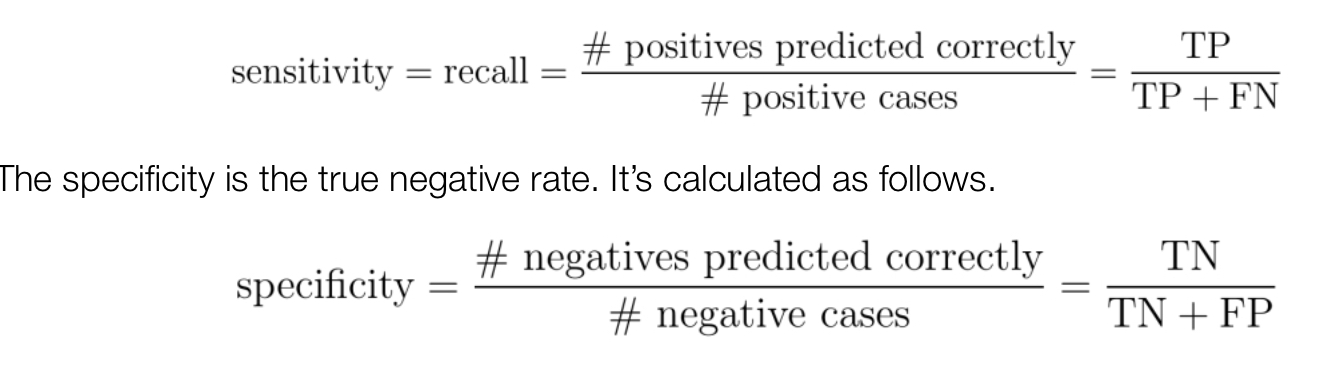

# Sensitivity and Specificity in Scikit-learn
Scikit-learn has not defined functions for sensitivity and specificity, but we can do it ourselves. Sensitivity is the same as recall, so it is easy to define.


```
from sklearn.metrics import recall_score
sensitivity_score = recall_score
print(sensitivity_score(y_test, y_pred)) 
# 0.6829268292682927
```
Now, to define specificity, if we realize that it is also the recall of the negative class, we can get the value from the sklearn function precision_recall_fscore_support.

Let’s look at the output of precision_recall_fscore_support.


```
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y, y_pred))
```

The second array is the recall, so we can ignore the other three arrays. There are two values. The first is the recall of the negative class and the second is the recall of the positive class. The second value is the standard recall or sensitivity value, and you can see the value matches what we got above. The first value is the specificity. So let’s write a function to get just that value.



```
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]
print(specificity_score(y_test, y_pred)) 
# 0.9214285714285714
```




In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_recall_fscore_support

sensitivity_score = recall_score
def specificity_score(y_true, y_pred):
	p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
	return r[0]

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("sensitivity:", sensitivity_score(y_test, y_pred))
print("specificity:", specificity_score(y_test, y_pred))

sensitivity: 0.6829268292682927
specificity: 0.9214285714285714


# Adjusting The Logistic Regression Threshold in sci-learn
When you use scikit-learn’s predict method, you are given 0 and 1 values of the prediction. However, behind the scenes the Logistic Regression model is getting a probability value between 0 and 1 for each datapoint and then rounding to either 0 or 1. If we want to choose a different threshold besides 0.5, we’ll want those probability values. We can use the predict_proba function to get them.


```
(model.predict_proba(X_test)
```



In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("predict proba:")
print(model.predict_proba(X_test))

y_pred = model.predict_proba(X_test)[:, 1] > 0.75

print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

# **ROC**
*Reciever Operating Characteristic*
Is a graph that shows the performance of all the possibble models generated from altering the threshold in Logistic Regression

How to Build an ROC Curve

The ROC curve is a graph of the specificity vs the sensitivity. We build a Logistic Regression model and then calculate the specificity and sensitivity for every possible threshold. Every predicted probability is a threshold.


```
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()
```



# **ROC Curve Interpretation**

The ROC curve is showing the performance, not of a single model, but of many models. Each choice of threshold is a different model.

#**Area Under The Curve**

We’ll sometimes what to use the ROC curve to compare two different models. Here is a comparison of the ROC curves of two models.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

model 1 AUC score: 0.8094184296715942
model 1 AUC score: 0.7964061255200496



# What is Cross Validation
 Cross Validation is a very useful technique for assessing the performance of machine learning models. It helps in knowing how the machine learning model would generalize to an independent data set. You want to use this technique to estimate how accurate the predictions your model will give in practice.



#Concerns with Training and Test Set

We are doing evaluation because we want to get an accurate measure of how well the model performs. If our dataset is small, our test set is going to be small. Thus it might not be a good random assortment of datapoints and by random chance end up with easy or difficult datapoints in our evaluation set.

Instead of doing a single train/test split, we’ll split our data into a training set and test set multiple times.

In [ ]:
## You can see that each time we run it,
## we get different values for the metrics. 
##The accuracy ranges from 0.79 to 0.84, the precision from 0.75 to 0.81 and the recall from 0.63 to 0.75.
## These are wide ranges that just depend on how lucky
## or unlucky we were in which datapoints ended up in the test set.


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

# building the model
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluating the model
y_pred = model.predict(X_test)
print(" accuracy: {0:.5f}".format(accuracy_score(y_test, y_pred)))
print("precision: {0:.5f}".format(precision_score(y_test, y_pred)))
print("   recall: {0:.5f}".format(recall_score(y_test, y_pred)))
print(" f1 score: {0:.5f}".format(f1_score(y_test, y_pred)))

 accuracy: 0.72973
precision: 0.71429
   recall: 0.62500
 f1 score: 0.66667


# Multiple Training and Test Sets
We learned in the previous part that depending on our test set, we can get different values for the evaluation metrics. We want to get a measure of how well our model does in general, not just a measure of how well it does on one specific test set.

Instead of just taking a chunk of the data as the test set, let’s break our dataset into 5 chunks. Let’s assume we have 200 datapoints in our dataset.

Each of these 5 chunks will serve as a test set. When Chunk 1 is the test set, we use the remaining 4 chunks as the training set. Thus we have 5 training and test sets as follows.

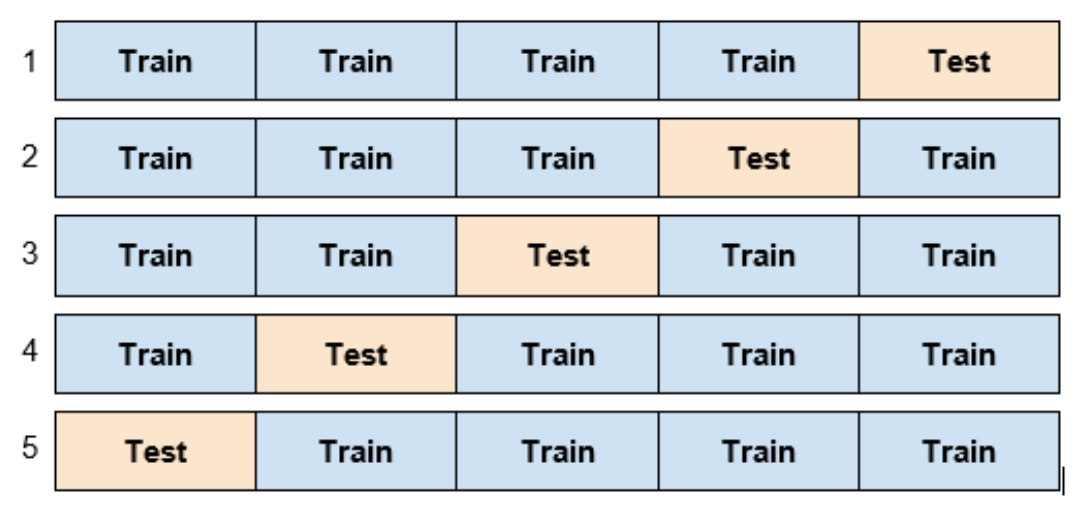

This process for creating multiple training and test sets is called k-fold cross validation. The k is the number of chunks we split our dataset into. The standard number is 5, as we did in our example above.

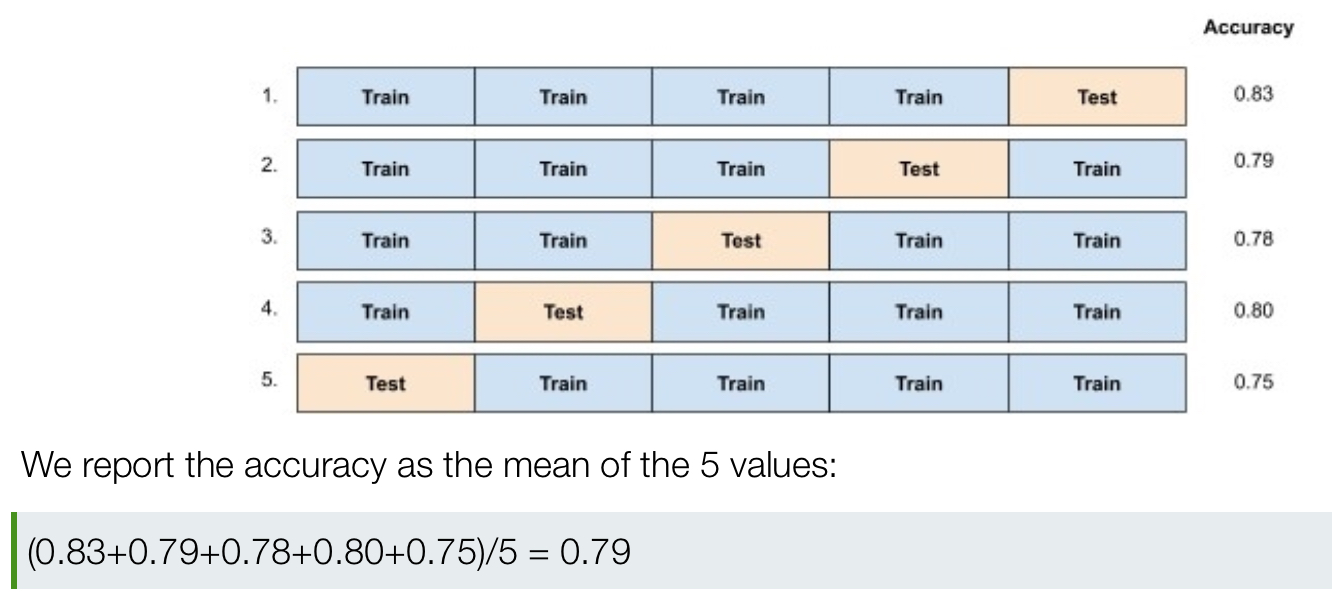

# Final Model Choice in Kfold Cross Validation
These 5 models were built just for evaluation purposes, so that we can report the metric values. We don’t actually need these models and want to build the best possible model. The best possible model is going to be a model **that uses all of the data**. So we keep track of our calculated values for our evaluation metrics and then build a model using all of the data.


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

print(model.predict([[3, True, 22.0, 1, 0, 7.25]]))
print(model.predict(X[:5]))
print(y[:5])

[0]
[0 1 1 1 0]
[0 1 1 1 0]


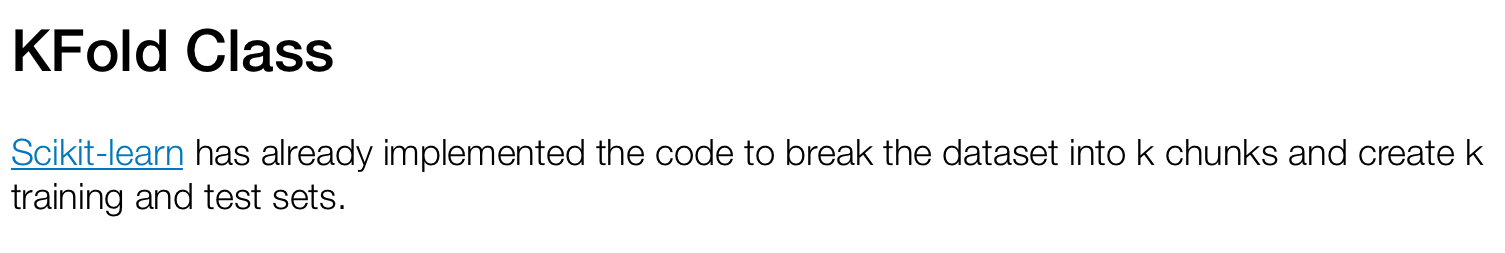

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
## For simplicity, let’s take a dataset with just 6 datapoints and 2 features 
## and a 3-fold cross validation on the dataset. 
## We’ll take the first 6 rows from the Titanic dataset
## and use just the Age and Fare columns.
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]
## We start by instantiating a KFold class object.
## It takes two parameters: n_splits (this is k, the number of chunks to create)
## and shuffle (whether or not to randomize the order of the data). 
## It’s generally good practice to shuffle the data since
## you often get a dataset that’s in a sorted order.
kf = KFold(n_splits=3, shuffle=True)
for train, test in kf.split(X):
    print(train, test)


[0 1 3 5] [2 4]
[2 3 4 5] [0 1]
[0 1 2 4] [3 5]


# **Creating Training and Test Sets with the Folds**

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]

kf = KFold(n_splits=3, shuffle=True)

##  We used the KFold class and split method
##  to get the indices that are in each of the splits. 
## Now let’s use that result to get our first (of 3) train/test splits.
#First let’s pull out the first split.
splits = list(kf.split(X))
first_split = splits[0]
print(first_split)
## The first array is the indices 
## for the training set and the second is 
## the indices for the test set. Let’s create these variables.
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)
# training set indices: [0, 2, 3, 5]
# test set indices: [1, 4]
## Now we can create an 
## X_train, y_train, X_test,
## and y_test based on these indices.
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
## If we print each of these out, we’ll see that we have four of the datapoints
## in X_train and their target values in y_train. 
## The remaining 2 datapoints are in X_test and their target values in y_test.
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

(array([0, 2, 3, 5]), array([1, 4]))
training set indices: [0 2 3 5]
test set indices: [1 4]
X_train
[[22.      7.25  ]
 [26.      7.925 ]
 [35.     53.1   ]
 [27.      8.4583]]
y_train [0 1 1 0]
X_test
[[38.     71.2833]
 [35.      8.05  ]]
y_test [1 0]


# Build a Model

Now we can use the training and test sets to build a model and make a prediction like before. Let’s go back to using the entire dataset (since 4 datapoints is not enough to build a decent model).

Here’s the entirety of the code to build and score the model on the first fold of a 5-fold cross validation. Note that the code for fitting and scoring the model is exactly the same as it was when we used the train_test_split function.


In [ ]:
# build a model
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True)

splits = list(kf.split(X))
train_indices, test_indices = splits[0]
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8033707865168539


# Loop Over All the Folds 

We have been doing one fold at a time, but really we want to loop over all the folds to get all the values. We will put the code from the previous part inside our for loop.



```
# scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)
# [0.75847, 0.83146, 0.85876, 0.76271, 0.74011]
```
Since we have 5 folds, we get 5 accuracy values. Recall, to get a single final value, we need to take the mean of those values.



```
# print(np.mean(scores))
# 0.79029
```

Now that we’ve calculated the accuracy, we no longer need the 5 different models that we’ve built. For future use, we just want a single model. To get the single best possible model, we build a model on the whole dataset. If we’re asked the accuracy of this model, we use the accuracy calculated by cross validation (0.79029) even though we haven’t actually tested this particular model with a test set.



```
final_model = LogisticRegression()
final_model.fit(X, y)
```






# Comparing Different Models

So far we’ve used our evaluation techniques to get scores for a single model. These techniques will become incredibly useful as we introduce more models and want to determine which one performs the best for a specific problem.



# Building the Models Scikit-learn
Let’s write the code to build the two models in scikit-learn. Then we’ll use k-fold cross validation to calculate the accuracy, precision, recall and F1 score for the two models so that we can compare them.

First, we import the necessary modules and prep the data as we’ve done before.


```
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
```
Now we can build the KFold object. We’ll use 5 splits as that’s standard. Note that we want to create a single KFold object that all of the models will use. It would be unfair if different models got a different split of the data.


```
kf = KFold(n_splits=5, shuffle=True)
```

Now we’ll create three different feature matrices X1, X2 and X3. All will have the same target y.


```
X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values
```

Since we’ll be doing it several times, let’s write a function to score the model. This function uses the KFold object to calculate the accuracy, precision, recall and F1 score for a Logistic Regression model with the given feature matrix X and target array y.

Then we call our function three times for each of our three feature matrices and see the results.



In [ ]:
# buliding the models with scikit-learn
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'

kf = KFold(n_splits=5, shuffle=True)

X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

def score_model(X, y, kf):
	accuracy_scores = []
	precision_scores = []
	recall_scores = []
	f1_scores = []
	for train_index, test_index in kf.split(X):
		X_train, X_test = X[train_index], X[test_index]
		y_train, y_test = y[train_index], y[test_index]
		model = LogisticRegression()
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		accuracy_scores.append(accuracy_score(y_test, y_pred))
		precision_scores.append(precision_score(y_test, y_pred))
		recall_scores.append(recall_score(y_test, y_pred))
		f1_scores.append(f1_score(y_test, y_pred))
	print("accuracy:", np.mean(accuracy_scores))
	print("precision:", np.mean(precision_scores))
	print("recall:", np.mean(recall_scores))
	print("f1 score:", np.mean(f1_scores))

print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

Logistic Regression with all features
accuracy: 0.8060750333269853
precision: 0.7796544982640645
recall: 0.6962985234996104
f1 score: 0.734239354514214

Logistic Regression with Pclass, Sex & Age features
accuracy: 0.7913540278042277
precision: 0.7455560817385496
recall: 0.7003031584306616
f1 score: 0.7210296635421365

Logistic Regression with Fare & Age features
accuracy: 0.6538881482892147
precision: 0.6404085045389393
recall: 0.2373792512845608
f1 score: 0.34525387340112557


# Choosing a Best Model
Let’s look at the results from the previous part.


```
Logistic Regression with all features
accuracy: 0.7959055418015616
precision: 0.764272127669388
recall: 0.6783206767486641
f1 score: 0.7163036778464393

Logistic Regression with Pclass, Sex & Age features
accuracy: 0.7981908207960389
precision: 0.7715749823848419
recall: 0.6830371999703425
f1 score: 0.7232930032930033

Logistic Regression with Fare & Age features
accuracy: 0.6538944962864216
precision: 0.6519918328980114
recall: 0.23722965720416847
f1 score: 0.34438594236494796
```
If we compare the first two models, they have almost identical scores. The third model has lower scores for all four metrics. The first two are thus much better options than the third. This matches intuition since the third model doesn’t have access to the sex of the passenger. Our expectation is that women are more likely to survive, so having the sex would be a very valuable predictor.

Since the first two models have equivalent results, it makes sense to choose the simpler model, the one that uses the Pclass, Sex & Age features.

Now that we’ve made a choice of a best model, we build a single final model using all of the data.


```
model = LogisticRegression()
model.fit(X1, y)
```




In [ ]:
# choosing the best model
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'

kf = KFold(n_splits=5, shuffle=True)

X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

def score_model(X, y, kf):
	accuracy_scores = []
	precision_scores = []
	recall_scores = []
	f1_scores = []
	for train_index, test_index in kf.split(X):
		X_train, X_test = X[train_index], X[test_index]
		y_train, y_test = y[train_index], y[test_index]
		model = LogisticRegression()
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		accuracy_scores.append(accuracy_score(y_test, y_pred))
		precision_scores.append(precision_score(y_test, y_pred))
		recall_scores.append(recall_score(y_test, y_pred))
		f1_scores.append(f1_score(y_test, y_pred))
	print("accuracy:", np.mean(accuracy_scores))
	print("precision:", np.mean(precision_scores))
	print("recall:", np.mean(recall_scores))
	print("f1 score:", np.mean(f1_scores))

print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

model = LogisticRegression()
model.fit(X1, y)

print(model.predict([[3, False, 25, 0, 1, 2]]))

Logistic Regression with all features
accuracy: 0.7993715482765187
precision: 0.7602137268171425
recall: 0.6895001407809511
f1 score: 0.7226108350645852

Logistic Regression with Pclass, Sex & Age features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy: 0.7947882942931506
precision: 0.7477727905698185
recall: 0.706237234344934
f1 score: 0.7255110517999162

Logistic Regression with Fare & Age features
accuracy: 0.6527772487780105
precision: 0.6381297134238311
recall: 0.23027204964704967
f1 score: 0.3368205186501772
[1]


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
print((y == y_pred).sum())
print((y == y_pred).sum() / y.shape[0])
print(model.score(X, y))

714
0.8049605411499436
0.8049605411499436


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
print(cancer_data.keys())
print(cancer_data['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']
print(df.head())

   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

model = LogisticRegression(solver='liblinear')
model.fit(X, y)
print("prediction for datapoint 0:", model.predict([X[0]]))
print(model.score(X, y))

prediction for datapoint 0: [0]
0.9595782073813708


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']
print(df.head())

   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

model = LogisticRegression(solver='liblinear')
model.fit(X, y)
print("prediction for datapoint 0:", model.predict([X[0]]))
print(model.score(X, y))

prediction for datapoint 0: [0]
0.9595782073813708
